# Importing Required Packages/Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

# Accessing the Datasets

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Exploring the "train" dataset

In [10]:
print(train.shape)
train.head(3)

(103904, 25)


,Unnamed:_0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1


In [14]:
train

,Unnamed:_0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,0
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,0


### Two unnecessary columns, 'Unnamed: 0' and 'id', are dropped from the 'train' dataset. After removing these columns, the 'train.info()' function is used to check the size and information of the dataset.

In [15]:
# Removing unnecessary Columns
train = train.drop('Unnamed:_0', axis=1)
train = train.drop('id', axis=1)

# Checking the Resulting Dataset Size
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer_Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type_of_Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight_Distance                    103904 non-null  int64  
 6   Inflight_wifi_service              103904 non-null  int64  
 7   Departure/Arrival_time_convenient  103904 non-null  int64  
 8   Ease_of_Online_booking             103904 non-null  int64  
 9   Gate_location                      103904 non-null  int64  
 10  Food_and_drink                     103904 non-null  int64  
 11  Online_boarding                    1039

In [16]:
# Checking the resulting dataframe (train)

print(train.shape)
train.head(3)

(103904, 23)


,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1


## Column Name Modification: Replacing Spaces with Underscores (Train and Test Datasets)

In [17]:
train.columns = [c.replace(' ', '_') for c in train.columns]
test.columns = [c.replace(' ', '_') for c in test.columns]

## Label Encoding: Transforming "Satisfaction" Values into Binary Format (Train and Test Datasets)

In [18]:
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [8]:
train

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


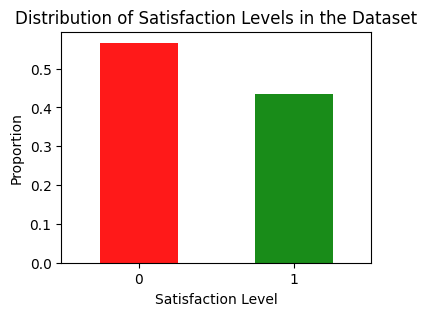

In [19]:
# Plotting the satisfaction indicator
fig = plt.figure(figsize=(4, 3))
train.satisfaction.value_counts(normalize=True).plot(kind='bar', color=['red', 'green'], alpha=0.9, rot=0)

# Setting plot title and axis labels
plt.title('Distribution of Satisfaction Levels in the Dataset')
plt.xlabel('Satisfaction Level')
plt.ylabel('Proportion')

# Displaying the plot
plt.show()

#### The plot indicates a fairly balanced distribution of satisfaction levels, with approximately 55% for "neutral/dissatisfied" passengers and 45% for "satisfied" passengers. Consequently, there is no immediate need for resampling techniques to address class imbalance in the dataset.

## Managing Missing Data: Strategies and Techniques

In [20]:
# Calculate the total count of missing values for each column ('train' dataset) 
total = train.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values for each column ('train' dataset)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)

# Concatenate the total count and percentage of missing values into a DataFrame called 'missing'
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Exclude rows with zero total missing values
missing = missing[missing['Total'] > 0]

# Display the top rows of the 'missing' DataFrame
missing.head()

,Total,Percent
Arrival_Delay_in_Minutes,310,0.002984


In [21]:
# Imputing missing value with mean - Train and Test
train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(train['Arrival_Delay_in_Minutes'].mean())
test['Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].fillna(test['Arrival_Delay_in_Minutes'].mean())

In [22]:
# Check the list of categorical variables
train.select_dtypes(include=['object']).columns

Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'], dtype='object')

In [23]:
# Replace NaN with mode (most frequent value) for categorical variables in the 'train' dataset
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Customer_Type'] = train['Customer_Type'].fillna(train['Customer_Type'].mode()[0])
train['Type_of_Travel'] = train['Type_of_Travel'].fillna(train['Type_of_Travel'].mode()[0])
train['Class'] = train['Class'].fillna(train['Class'].mode()[0])

# Replace NaN with mode (most frequent value) for categorical variables in the 'test' dataset
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Customer_Type'] = test['Customer_Type'].fillna(test['Customer_Type'].mode()[0])
test['Type_of_Travel'] = test['Type_of_Travel'].fillna(test['Type_of_Travel'].mode()[0])
test['Class'] = test['Class'].fillna(test['Class'].mode()[0])

In [24]:
train.to_csv("data.csv", sep=',', index=False, encoding='utf-8')

## Uncovering Insights through Data Exploration

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


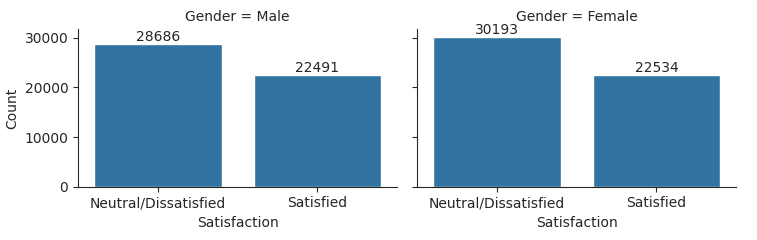

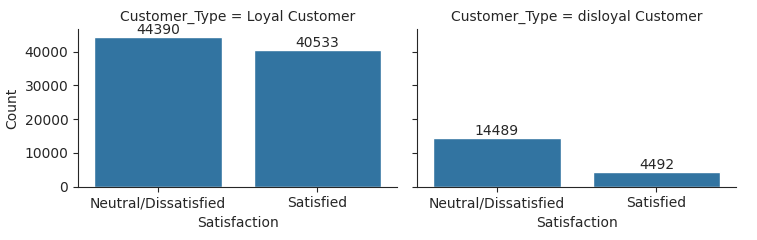

In [25]:
# Exploring Satisfaction Levels by Gender and Customer Type

with sns.axes_style(style='ticks'):
    gender_plot = sns.catplot(x="satisfaction", col="Gender", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.5)
    gender_plot.set_xticklabels(["Neutral/Dissatisfied", "Satisfied"])
    gender_plot.set_axis_labels("Satisfaction", "Count")
    for ax in gender_plot.axes.flat:
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
    customer_type_plot = sns.catplot(x="satisfaction", col="Customer_Type", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.5)
    customer_type_plot.set_xticklabels(["Neutral/Dissatisfied", "Satisfied"])
    customer_type_plot.set_axis_labels("Satisfaction", "Count")
    for ax in customer_type_plot.axes.flat:
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

**Findings:** 

Gender: The analysis reveals that there is a similar distribution of neutral/dissatisfied and satisfied customers across gender. Both male and female passengers exhibit a higher proportion of neutral/dissatisfied customers compared to satisfied customers.

Customer Type: Among the customer types, even though the number of loyal passengers is relatively high, the ratio of satisfied to neutral/dissatisfied customers is almost evenly split in it (loyal passengers) at around 48:52.

C:\Users\DELL\AppData\Local\Temp\ipykernel_11032\67373481.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  satisfaction_plot = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8,ci=None)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


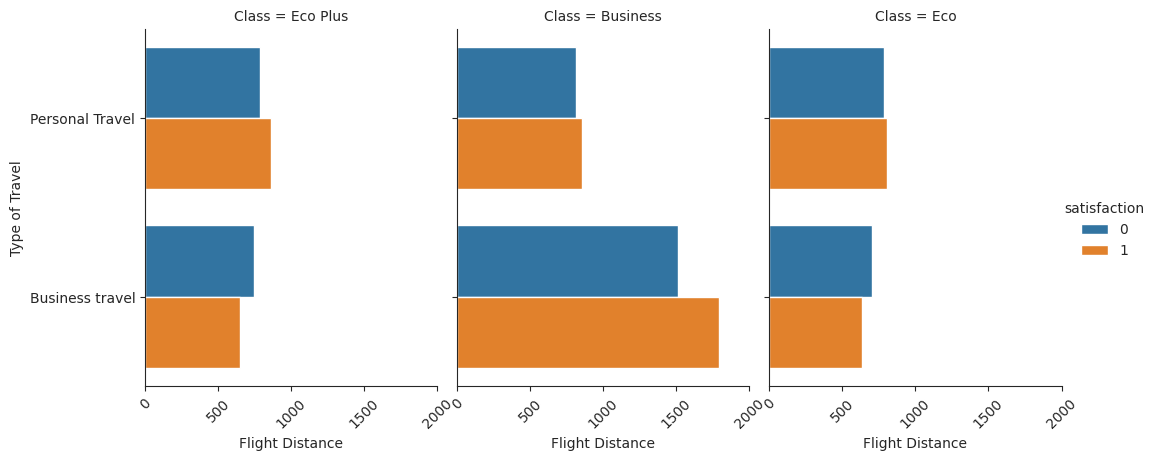

In [24]:
# Type_of_Travel and Flight_Distance by Class
with sns.axes_style(style='ticks'):
    satisfaction_plot = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8,ci=None)
    satisfaction_plot.set_axis_labels("Flight Distance", "Type of Travel")
    satisfaction_plot.set_xticklabels(rotation=45)
    satisfaction_plot.savefig('output1.png',format='png',bbox_inches='tight', dpi=1200)

**Findings:** The analysis reveals that within the business travel category and specifically in the business class, there is a notable increase in the number of satisfied passengers for longer flight distances. However, for other combinations of travel type, flight distance, and class, a relatively equal distribution of satisfied and neutral/dissatisfied passengers is observed.

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


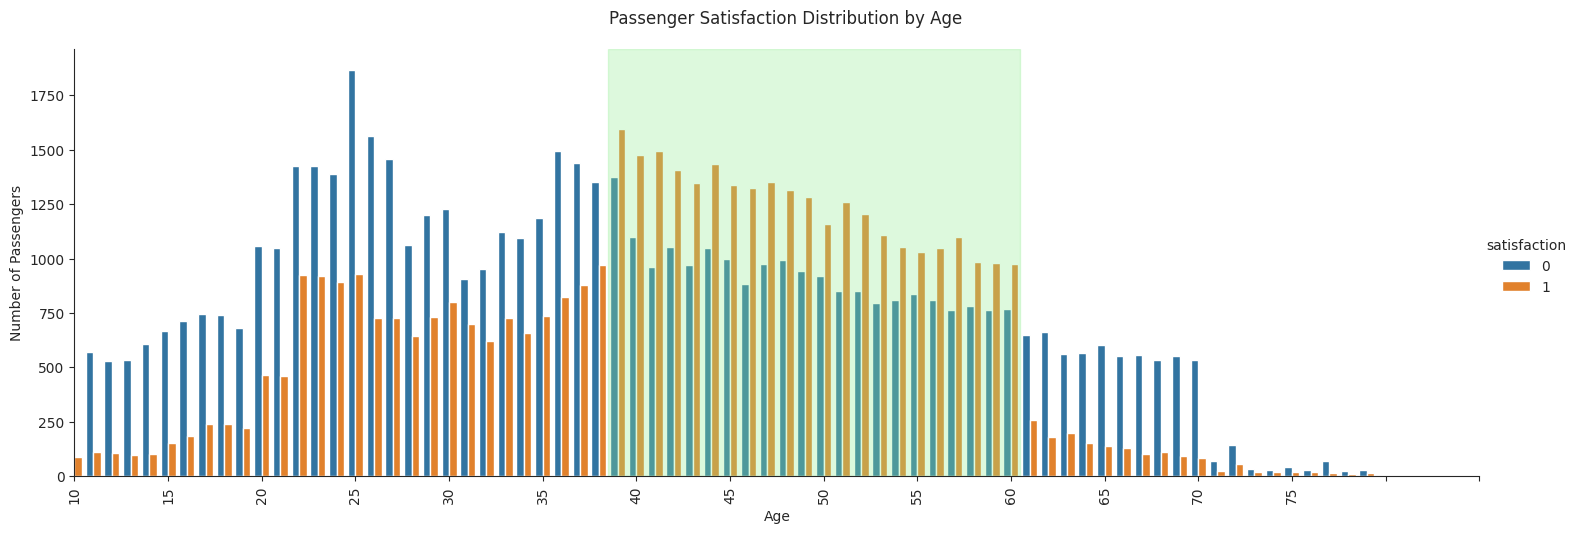

In [15]:
# Analysis of Passenger Satisfaction by Age
with sns.axes_style(style='ticks'):
    age_plot = sns.catplot(x="Age", data=train, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    age_plot.set_ylabels('Number of Passengers')
    age_plot.fig.suptitle('Passenger Satisfaction Distribution by Age', y=1.05)

    # Highlight age groups 39-60
    age_plot.ax.axvspan(33.5, 55.5, color='lightgreen', alpha=0.3)
    
    # Adjust x-axis range and labels
    plt.xlim(5, 80)
    plt.xticks(range(5, 81, 5), rotation=90)
    age_plot.savefig('output2.png',format='png',bbox_inches='tight', dpi=1200)

**Findings:** From ages 7 to 38 and from ages 61 to 79, there is a notable prevalence of neutral/dissatisfied passengers compared to satisfied passengers. Conversely, in the age group of 39 to 60 (green highlighted), the number of satisfied passengers surpasses that of neutral/dissatisfied passengers. This age-based variation in satisfaction levels highlights the importance of considering age demographics when addressing customer satisfaction within the airline industry.

C:\Users\DELL\AppData\Local\Temp\ipykernel_11032\1709702048.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g1 = sns.catplot(x="Class", y="Departure_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=1.0,ci=None)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DELL\AppData\Local\Temp\ipykernel_11032\1709702048.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g2 = sns.catplot(x="Class", y="Arrival_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=1.0,ci=None)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_

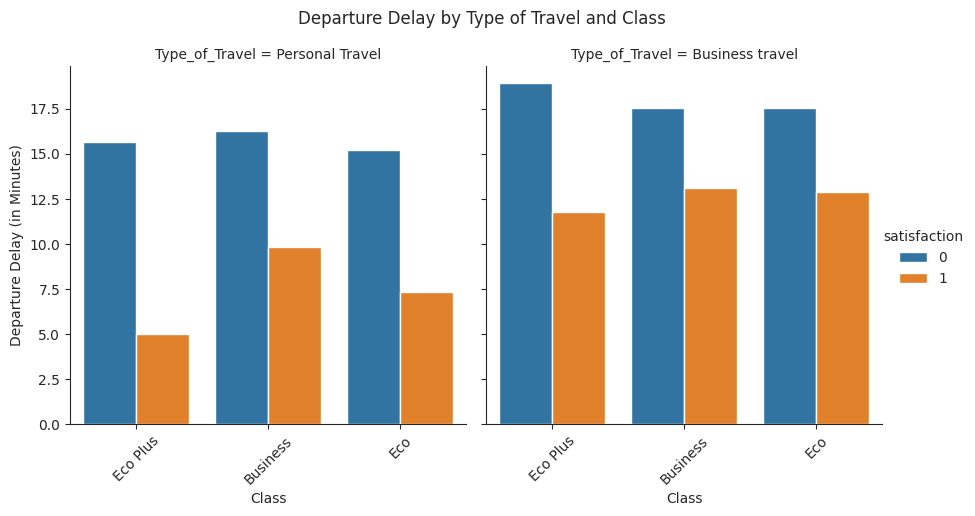

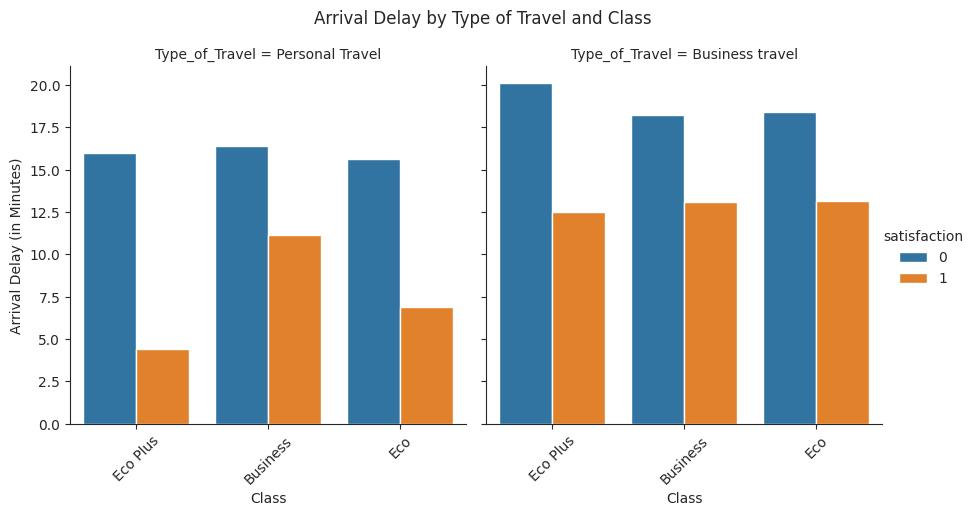

In [25]:
# Analysis of Departure and Arrival Delays by Type of Travel and Class
with sns.axes_style(style='ticks'):
    g1 = sns.catplot(x="Class", y="Departure_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=1.0,ci=None)
    g1.fig.suptitle('Departure Delay by Type of Travel and Class', y=1.05)
    g1.set_xticklabels(rotation=45)
    g1.set_ylabels('Departure Delay (in Minutes)')
    g1.savefig('output3.png',format='png',bbox_inches='tight', dpi=1200)
    
    g2 = sns.catplot(x="Class", y="Arrival_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=1.0,ci=None)
    g2.fig.suptitle('Arrival Delay by Type of Travel and Class', y=1.05)
    g2.set_xticklabels(rotation=45)
    g2.set_ylabels('Arrival Delay (in Minutes)')
    g2.savefig('output4.png',format='png',bbox_inches='tight', dpi=1200)

**Findings:** In the case of personal type of travel, particularly for classes Eco Plus and Eco, it is evident that there is a significant increase in the number of neutral/dissatisfied passengers when the arrival delay is high, which is expected. 

When examining the data on a minute-by-minute basis, it is observed that all combinations have a higher count of neutral/dissatisfied passengers compared to satisfied passengers.

C:\Users\DELL\AppData\Local\Temp\ipykernel_11032\3193532758.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="Departure/Arrival_time_convenient", y="Online_boarding", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=1.0,ci=None)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


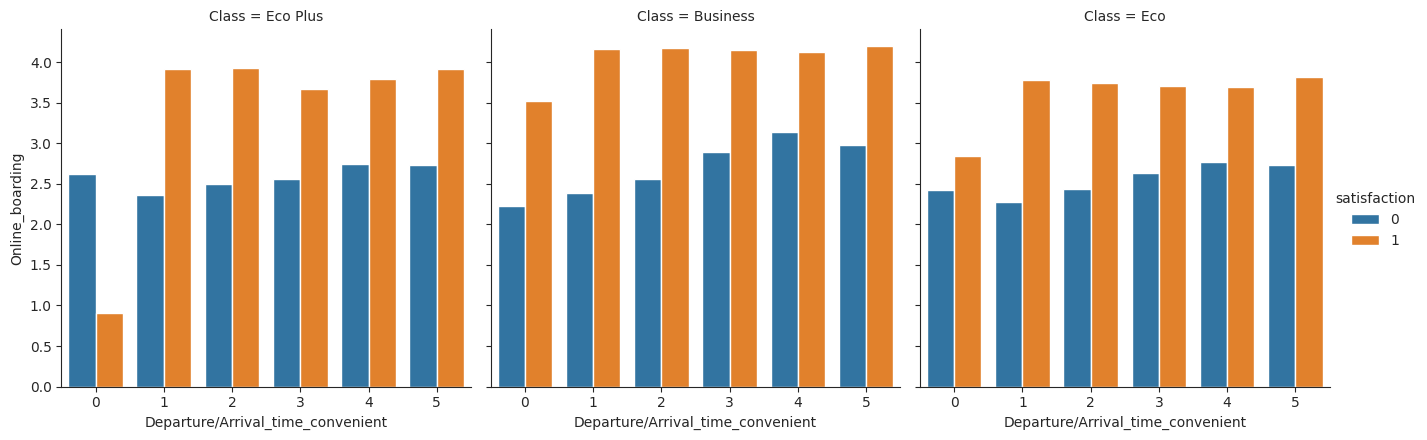

In [26]:
# Analysis of Online Boarding Experience and Departure/Arrival Time Convenience by Class

with sns.axes_style(style='ticks'):
    g = sns.catplot(x="Departure/Arrival_time_convenient", y="Online_boarding", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=1.0,ci=None)
    g.savefig('output5.png',format='png',bbox_inches='tight', dpi=1200)

**Findings:** In the Eco Plus class, a significant number of neutral/dissatisfied passengers are observed when the Departure/Arrival time convenience is rated as very inconvenient (score 0), despite positive online boarding experiences. However, in other class combinations, the number of satisfied passengers outweighs the number of neutral/dissatisfied passengers.

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


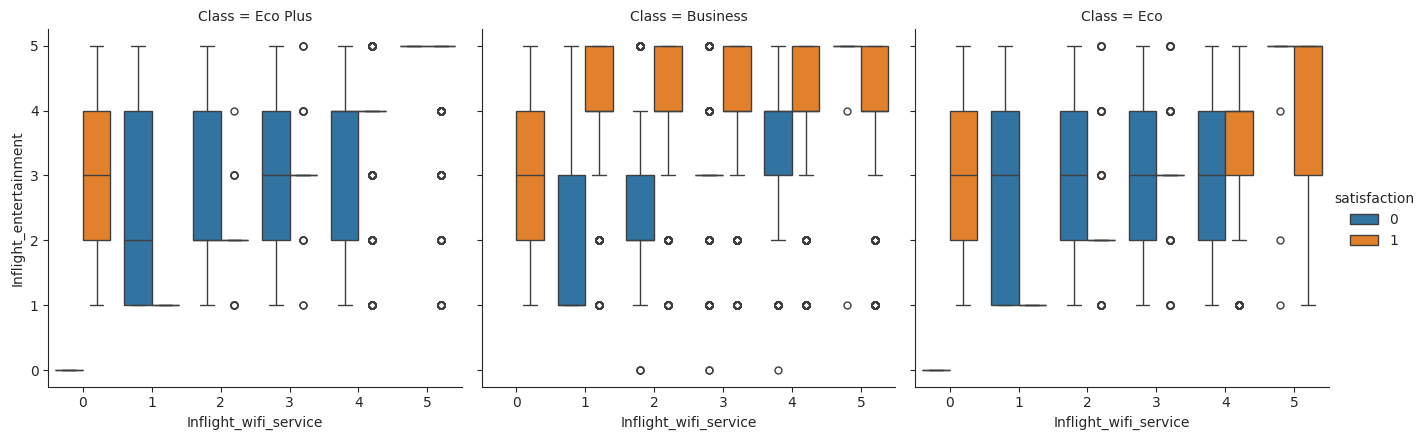

In [29]:
# Analysis of Inflight Wi-Fi Service and Inflight Entertainment by Class

# Analysis of Inflight Wi-Fi Service and Inflight Entertainment by Class

with sns.axes_style(style='ticks'):
    g = sns.catplot(x="Inflight_wifi_service", y="Inflight_entertainment", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=1.0)
    g.savefig('output6.png',format='png',bbox_inches='tight', dpi=1200)

**Findings:** 

(i) Eco Plus passengers show higher satisfaction levels when they do not have access to inflight Wi-Fi (rating 0) and when they experience moderate levels of inflight entertainment (ratings 2-4). 

(ii) In the case of Business class passengers, maximum satisfaction is achieved when they have access to the highest level of inflight entertainment (rating 5). 

(iii) For Eco class passengers, a combination of high levels of inflight entertainment (ratings 3-5) and excellent Wi-Fi service availability (rating 5) contributes to their satisfaction.

C:\Users\DELL\AppData\Local\Temp\ipykernel_11032\2225489277.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Class", y = "Age", palette = "YlOrBr", data = train, ax = ax[0])


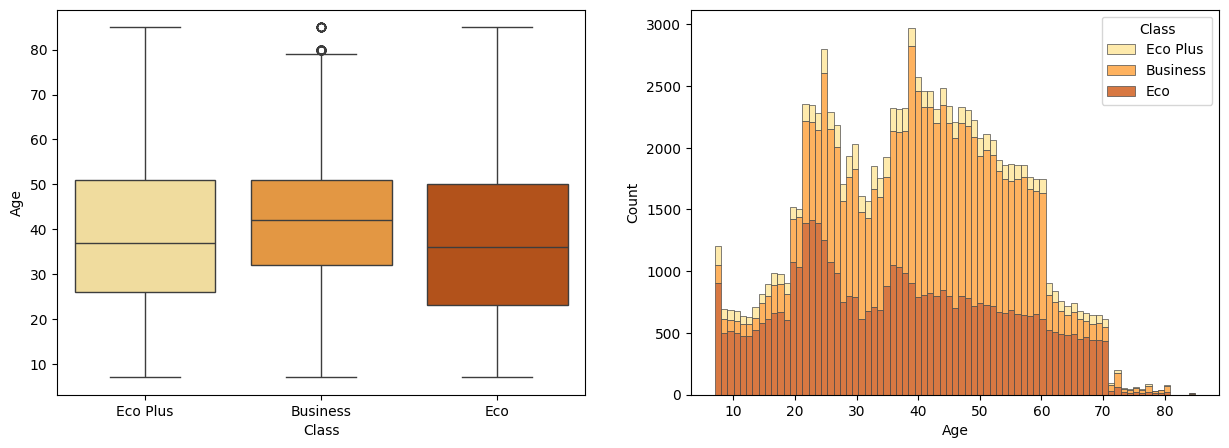

In [44]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", palette = "YlOrBr", data = train, ax = ax[0])
sns.histplot(train, x = "Age", hue = "Class", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
f.savefig('output11.png',format='png',bbox_inches='tight', dpi=1200)

### Satisfaction Ratings for Online Booking, Seat Comfort, Cleanliness, and Food & Drink

C:\Users\DELL\AppData\Local\Temp\ipykernel_11032\174882871.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="satisfaction", col="Ease_of_Online_booking", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0, palette="Set1")
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


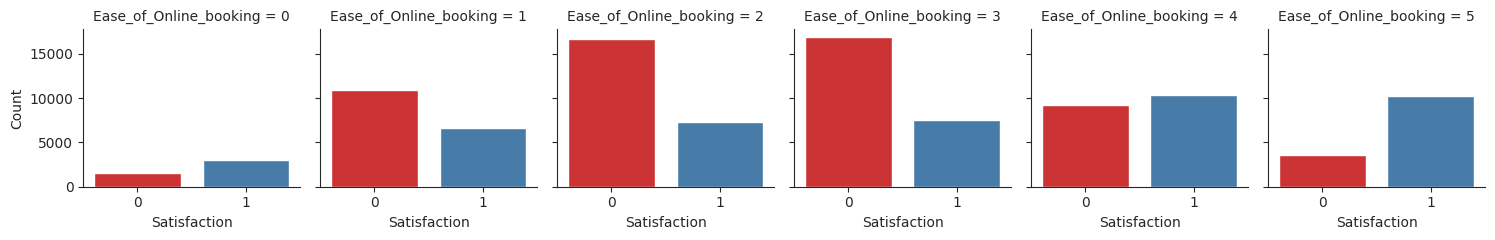

In [36]:
# Analysis of Satisfaction based on Ease of Online Booking
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="Ease_of_Online_booking", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0, palette="Set1")
    g.set_axis_labels("Satisfaction", "Count")
    g.savefig('output7.png',format='png',bbox_inches='tight', dpi=1200)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11032\3315847564.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="satisfaction", col="Seat_comfort", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0, palette="Set1")
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


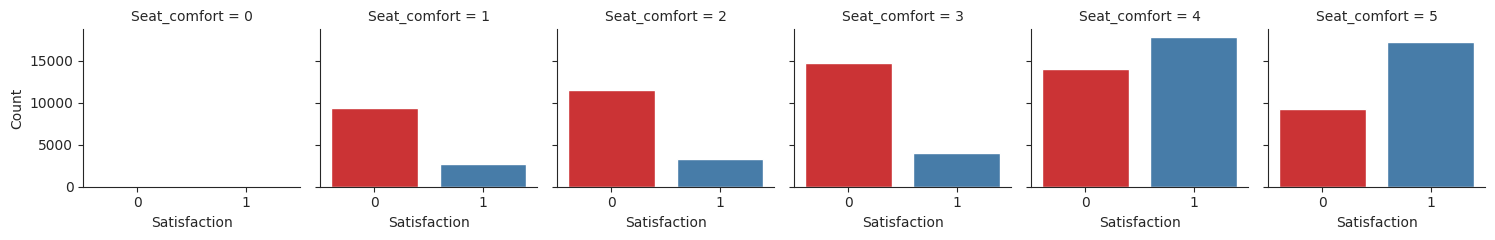

In [35]:
# Analysis of Satisfaction based on Seat Comfort
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="Seat_comfort", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0, palette="Set1")
    g.set_axis_labels("Satisfaction", "Count")
    g.savefig('output8.png',format='png',bbox_inches='tight', dpi=1200)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11032\3392977758.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="satisfaction", col="Cleanliness", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0, palette="Set1")
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


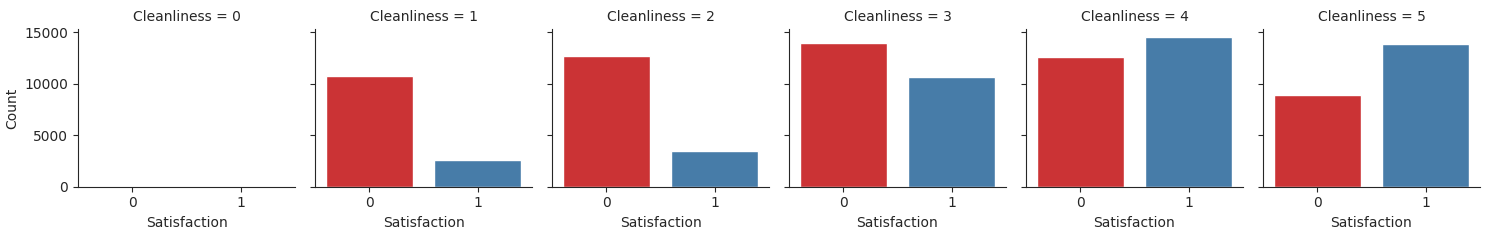

In [38]:
# Analysis of Satisfaction based on Cleanliness
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="Cleanliness", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0, palette="Set1")
    g.set_axis_labels("Satisfaction", "Count")

C:\Users\DELL\AppData\Local\Temp\ipykernel_11032\4153320758.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x="satisfaction", col="Food_and_drink", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0, palette="Set1")
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


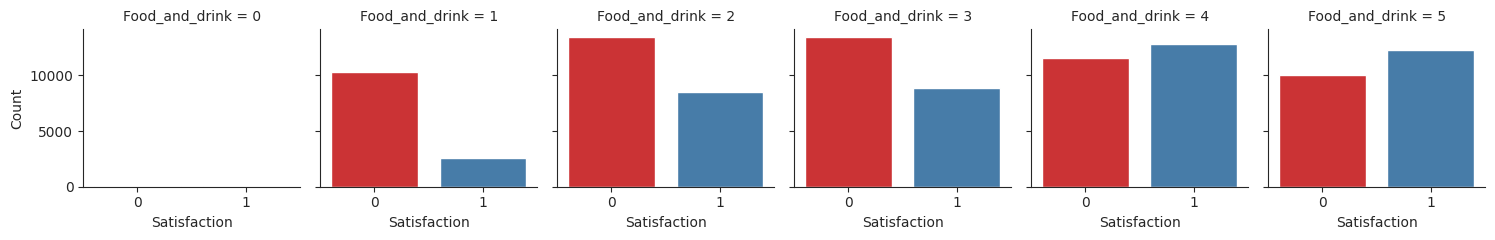

In [40]:
# Analysis of Satisfaction based on Food and Drink
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="Food_and_drink", col_wrap=6, data=train, kind="count", height=2.5, aspect=1.0, palette="Set1")
    g.set_axis_labels("Satisfaction", "Count")
    g.savefig('output9.png',format='png',bbox_inches='tight', dpi=1200)

**Findings:** Based on the analysis of these four features, it can be observed that the majority of satisfied passengers provided ratings of 4 and 5. On the other hand, passengers who rated these features below 4 tended to be more neutral or dissatisfied.

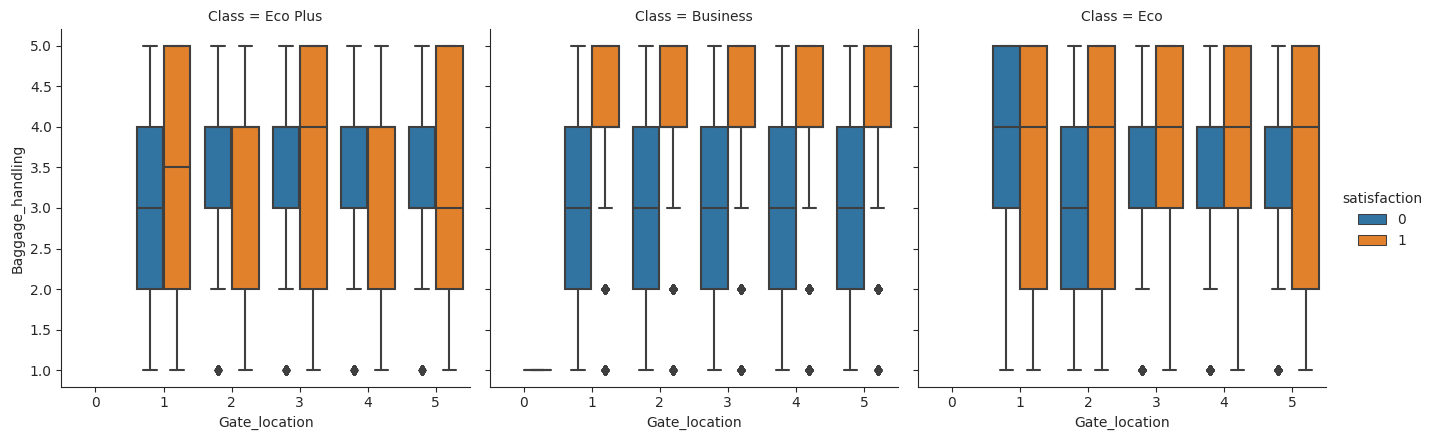

In [29]:
# Analysis of Baggage Handling and Gate Location by Class

with sns.axes_style(style='ticks'):
    g = sns.catplot(x="Gate_location", y="Baggage_handling", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=1.0)

**Findings:** After analyzing the data, it is evident that in the business class category, a higher number of neutral/dissatisfied passengers can be observed across all gate locations when the baggage handling rating is below satisfactory (rating <= 4). Additionally, for Eco Plus class, when the gate location is 1, and for Eco class, when the gate location is 2, passengers tend to remain neutral/dissatisfied even when the baggage handling is rated as mediocre (rating 2 to 4). These findings highlight the importance of both gate location and quality of baggage handling in influencing passenger satisfaction levels.

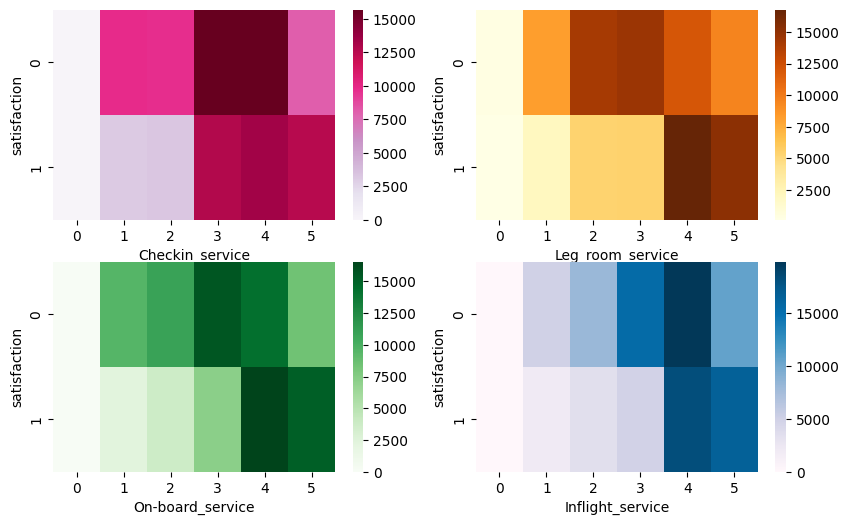

In [41]:
# Heatmap Analysis of Passenger Satisfaction Level for Checkin_service, Leg_room_service, On-board_service and Inflight_service

fig, axarr = plt.subplots(2, 2, figsize=(10, 6))

table1 = pd.crosstab(train['satisfaction'], train['Checkin_service'])
sns.heatmap(table1, cmap='PuRd', ax = axarr[0][0])
table2 = pd.crosstab(train['satisfaction'], train['Leg_room_service'])
sns.heatmap(table2, cmap='YlOrBr', ax = axarr[0][1])
table3 = pd.crosstab(train['satisfaction'], train['On-board_service'])
sns.heatmap(table3, cmap='Greens', ax = axarr[1][0])
table4 = pd.crosstab(train['satisfaction'], train['Inflight_service'])
sns.heatmap(table4, cmap='PuBu', ax = axarr[1][1])

plt.savefig('output10.png',format='png',bbox_inches='tight', dpi=1200)

**Findings:** Passenger satisfaction analysis reveals that for the check-in service, passengers who provided ratings of 0-2 were predominantly neutral or dissatisfied. Conversely, for the remaining services (leg room, on-board, and in-flight), satisfaction was primarily observed among passengers who rated these services with 4 or 5.

### Encoding Categorical Variables Using Label Encoding

In [26]:
# For Train set
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])

In [27]:
# For Test Set
lencoders_t = {}
for col in test.select_dtypes(include=['object']).columns:
    lencoders_t[col] = LabelEncoder()
    test[col] = lencoders_t[col].fit_transform(test[col])


### Identifying and Eliminating Outliers

The interquartile range (IQR) for each numerical variable in the dataset, represents the range between the 25th and 75th percentiles of the data. For instance, the IQR for the 'Age' variable is 24, indicating that the middle 50% of the age values fall within this range. 

By calculating the IQR, we can identify potential outliers in the data by considering values that are significantly higher or lower than the range defined by the IQR.

In [28]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                                  1.0
Customer_Type                           0.0
Age                                    24.0
Type_of_Travel                          1.0
Class                                   1.0
Flight_Distance                      1329.0
Inflight_wifi_service                   2.0
Departure/Arrival_time_convenient       2.0
Ease_of_Online_booking                  2.0
Gate_location                           2.0
Food_and_drink                          2.0
Online_boarding                         2.0
Seat_comfort                            3.0
Inflight_entertainment                  2.0
On-board_service                        2.0
Leg_room_service                        2.0
Baggage_handling                        2.0
Checkin_service                         1.0
Inflight_service                        2.0
Cleanliness                             2.0
Departure_Delay_in_Minutes             12.0
Arrival_Delay_in_Minutes               13.0
satisfaction                    

In [29]:
# Removal of outliers from dataset
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

(61197, 23)

### Exploring Feature Correlations

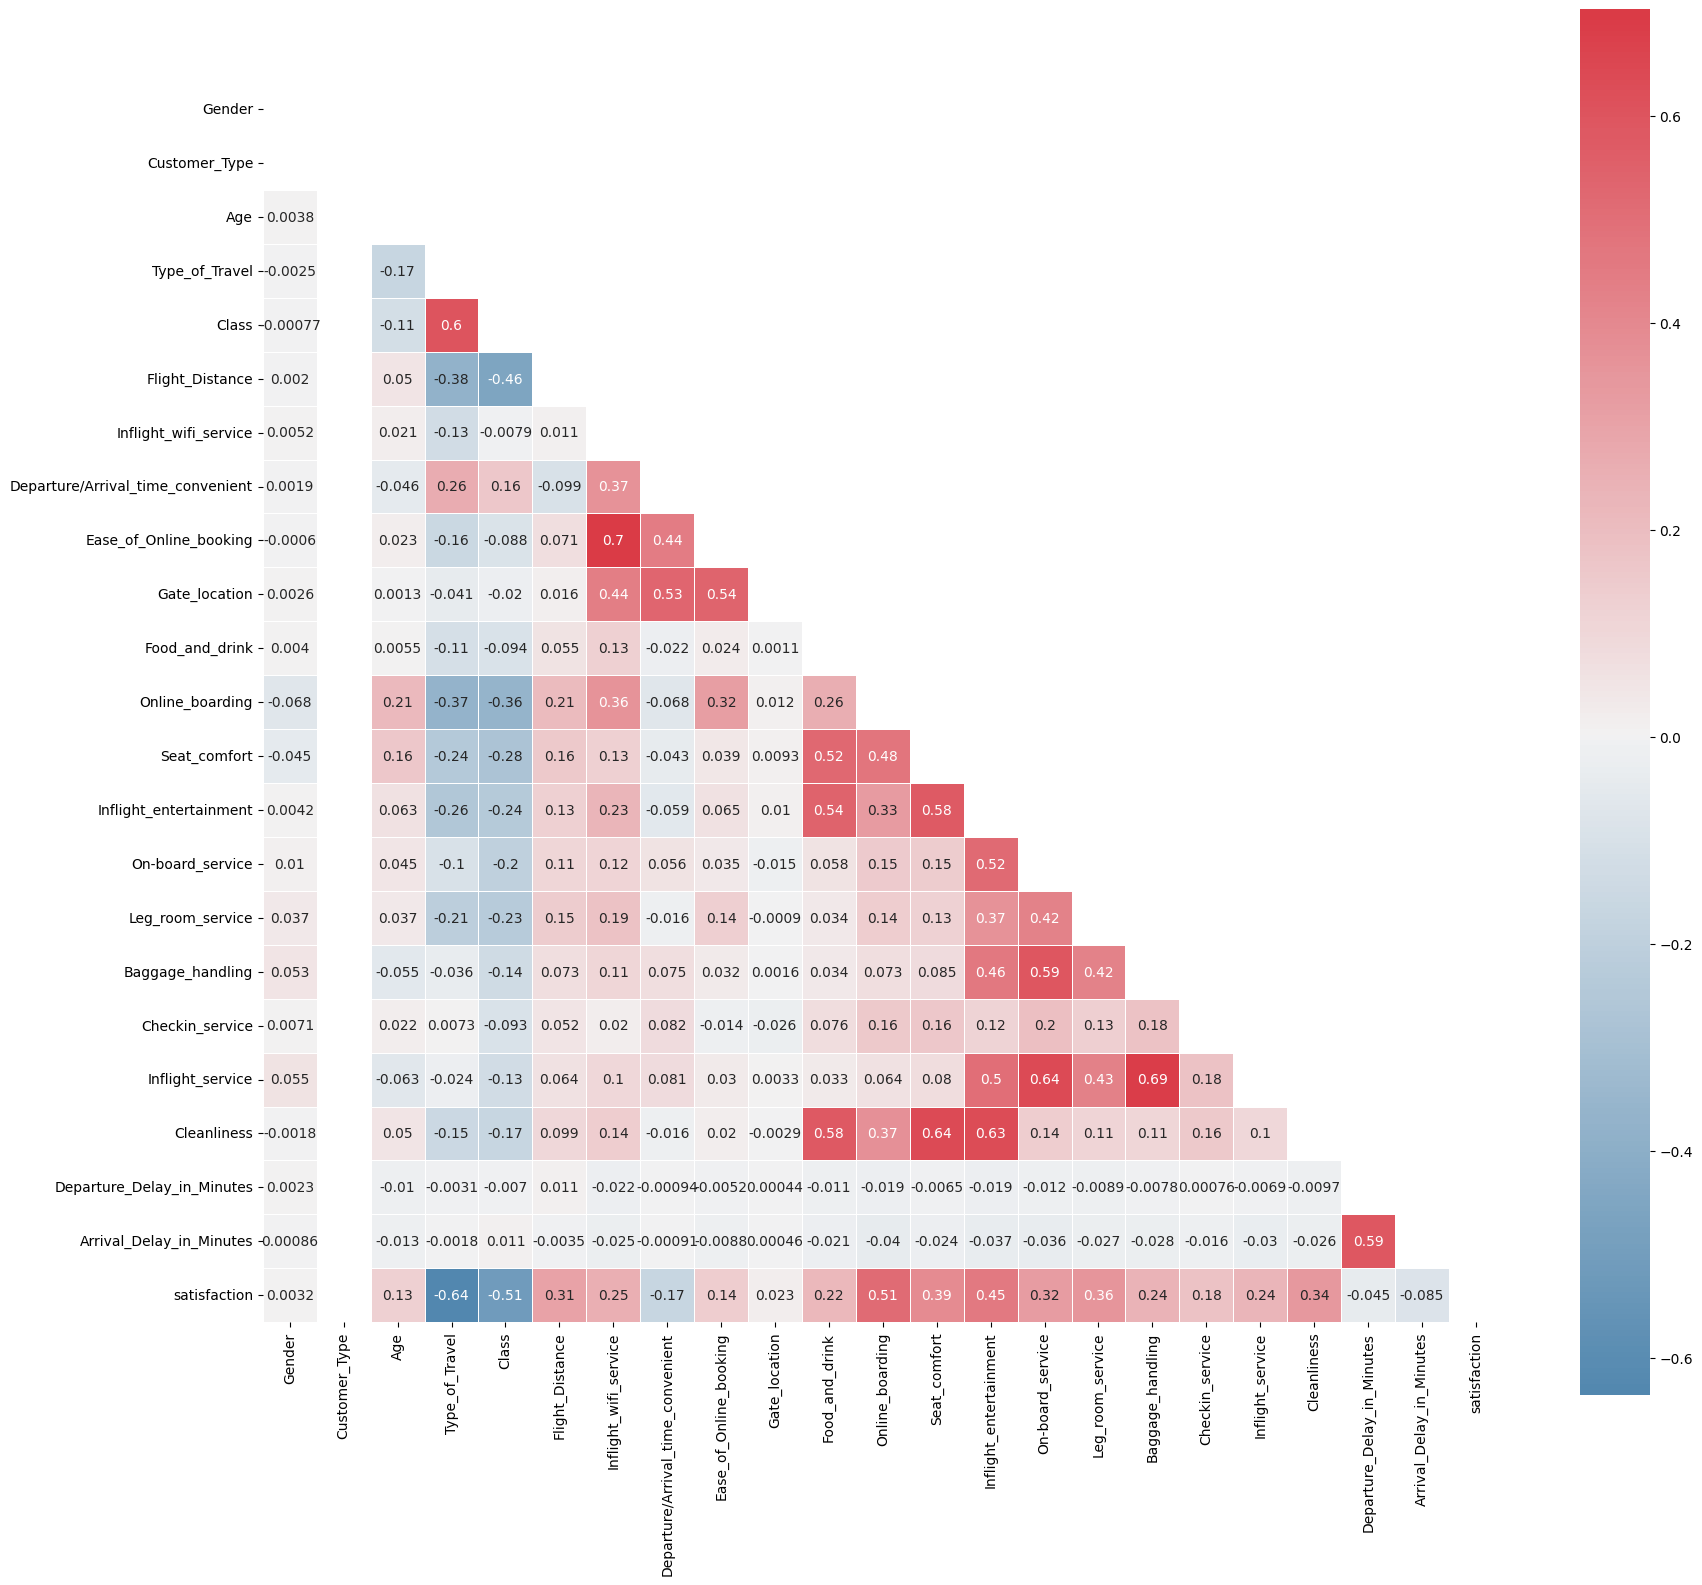

In [32]:
# Correlation Heatmap

corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
f.savefig('output12.png',format='png',bbox_inches='tight', dpi=1200)

**Findings:** The feature "Ease_of_Online_booking" exhibits a strong correlation with "Inflight_wifi_service", while "Inflight_service" demonstrates a high correlation with "Baggage_handling". However, none of the feature pairs have a correlation coefficient equal to 1, indicating the absence of perfect multicollinearity. As a result, we do not need to discard any variables in our analysis.

**Findings:** A set of six features has been identified (see above) as inherently important contributors to customer or passenger satisfaction. In order to validate the results, an additional feature importance method was employed for cross-referencing.